In [12]:
import cv2
import numpy as np
import time
import matplotlib.pyplot as plt

In [13]:
def videoReader(video,play=False):
    cap = cv2.VideoCapture(video)
    if (cap.isOpened() == False): 
        print("Error opening video stream or file")
    if play:
        while(cap.isOpened()):
            ret, frame = cap.read()
            if ret == True:
                cv2.imshow('Frame',frame)
                if cv2.waitKey(25) & 0xFF == ord('q'):
                    break
            else:
                break
        cap.release()
        cv2.destroyAllWindows()
    return cap

In [19]:
cap = videoReader('../videos_h264/dubai.avi')
numberOfFrames = int(cap.get(cv2.CAP_PROP_FRAME_COUNT))
width  = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH))
height = int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))
print(numberOfFrames,width,height)

1889 1920 1080


In [15]:
img = cv2.imread('input_images/singapore.jpg')
height, width = img.shape[:2]
print(height, width)

394 700


In [16]:
def ImageHistogram(image, nbins=256):
    hist_b = cv2.calcHist([image],[0],None,[nbins],[0,256]) 
    hist_g = cv2.calcHist([image],[1],None,[nbins],[0,256]) 
    hist_r = cv2.calcHist([image],[2],None,[nbins],[0,256])
    
    hist_des = np.vstack((hist_r,hist_g,hist_b))
    hist_des = hist_des/image.size
    return hist_des

In [17]:
def best_distribution_frame(image,video):
    '''Search for best frame given a particular video'''
    sampling_rate = 25
    image_descriptor = ImageHistogram(image)
    
    min_distance = 100000
    min_index = 0
    
    for i in range(0,numberOfFrames,sampling_rate):
        video.set(cv2.CAP_PROP_POS_FRAMES, i)
        res, frame = video.read()
        frame_descriptor = ImageHistogram(frame)
        distance = np.linalg.norm(frame_descriptor - image_descriptor)
        if min_distance > distance:
            min_distance = distance
            min_index = i
    
    # Resizing the matched frame to image size, for future operations
    video.set(cv2.CAP_PROP_POS_FRAMES, min_index)
    res, matched_frame = video.read()
    matched_frame = cv2.resize(matched_frame,(image.shape[1],image.shape[0]),cv2.INTER_CUBIC)
    return matched_frame, min_index

In [22]:
a = time.time()
matched_frame, matched_frame_index = best_distribution_frame(img,cap)
print("Matched frame:",matched_frame_index)
print("Time taken:",time.time() - a)

Matched frame: 1450
Time taken: 6.201521873474121


(394, 700, 3)
(394, 700, 3)


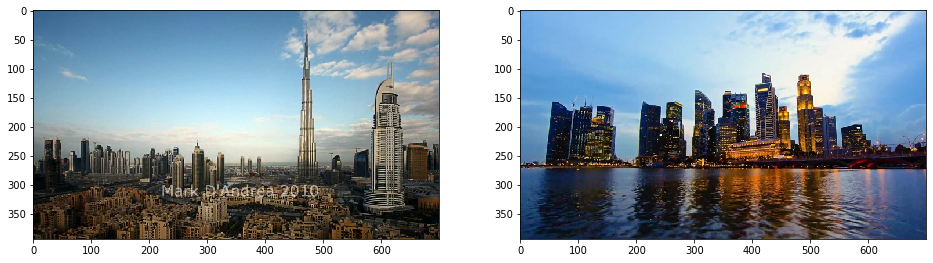

In [10]:
print(matched_frame.shape)
print(img.shape)
plt.figure(figsize=(16,16))
plt.subplot(1,2,1)
plt.imshow(matched_frame[...,::-1])
plt.subplot(1,2,2)
plt.imshow(img[...,::-1])